In [1]:
import sklearn
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("data/kc_house_data.csv")

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
from math import log

def nonlinear_features(row):
    row['bedrooms_squared'] = row['bedrooms']**2
    row['bed_bath_rooms'] = row['bedrooms'] * row['bathrooms']
    row['lat_plus_long'] = row['lat'] + row['long']
    row['log_sqft_living'] = log(row['sqft_living'])
    return row

data = data.apply(nonlinear_features, axis=1)

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=0)

In [9]:
features = [x for x in data._get_numeric_data().columns if x not in ['price', 'date']]
label = ['price']

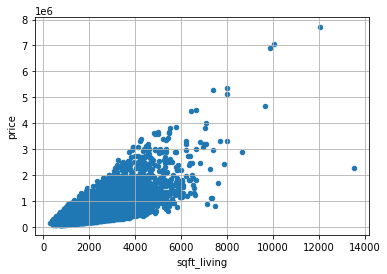

In [10]:
fig = train_set.plot(kind="scatter", x='sqft_living', y='price', grid=True)

In [11]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class GD_Regression(BaseEstimator, RegressorMixin):
    def __init__(self, eta0=0.01, max_iterations=500):
        self.theta_ = np.zeros(shape=(1,))
        self.eta = eta0
        self.max_iterations = max_iterations

    def fit(self, X, y):
        X = np.array(X)
        y = np.ravel(np.array(y))
        X, y = check_X_y(X, y)
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]
        self.theta_ = np.zeros(shape=X_b.shape[1])
        for i in range(self.max_iterations):
            gradients = 2/m * X_b.T.dot(X_b.dot(self.theta_) - y)
            self.theta_ = self.theta_ - self.eta * gradients
        return self
    
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]
        return X_b.dot(self.theta_)
    
    def get_params(self, deep=True):
        result = {}
        for i in range(self.theta_.shape[0]):
            name = 'theta_'+str(i)
            result[name] = self.theta_[i]
        return result
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def get_RSS(self, X, y):
        X = np.array(X)
        y = np.ravel(np.array(y))
        predictions = self.predict(X)
        residuals = predictions - y
        RSS = np.square(residuals).sum()
        return(RSS)

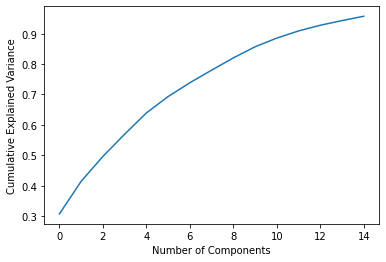

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

x = StandardScaler().fit_transform(data[features])
pca = PCA(0.95).fit(x)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
fig = plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

numerical_preprocessor = Pipeline([('num_standard', StandardScaler()), ('PCA', PCA(n_components=0.95))])
data_preprocessor_one = ColumnTransformer([('numerical_preprocessor', numerical_preprocessor, features)])
pipeline = Pipeline(steps=[('data_preprocessor', data_preprocessor_one),
                           ('Regression_Model', GD_Regression())])

# Visualize the pipeline
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('data_preprocessor',
                 ColumnTransformer(transformers=[('numerical_preprocessor',
                                                  Pipeline(steps=[('num_standard',
                                                                   StandardScaler()),
                                                                  ('PCA',
                                                                   PCA(n_components=0.95))]),
                                                  ['id', 'bedrooms',
                                                   'bathrooms', 'sqft_living',
                                                   'sqft_lot', 'floors',
                                                   'waterfront', 'view',
                                                   'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15',
                                                   'bedrooms_squared',
                                                   'bed_bath_rooms',
                                                   'lat_plus_long',
                                                   'log_sqft_living'])])),
                ('Regression_Model', GD_Regression(theta_0=0.0))])

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

def pipeline_prediction_plot(feature, label, pipeline):
    # Get train data to train the pipeline
    X_train = train_set[feature]
    y_train = train_set[label]
    
    pipeline.fit(X_train, y_train)
    
    # Use the fitted pipeline to make predictions on the train dataset
    train_predictions = pipeline.predict(X_train)
    
    # Get test data to test the pipeline
    X_test = test_set[feature]
    y_test = test_set[label]

    # Use the fitted pipeline to make predictions on the test dataset
    test_predictions = pipeline.predict(X_test)

    sns.regplot(x=y_train, y=train_predictions, scatter_kws={'alpha':1, 'color':'brown'})
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title("Training Set")
    plt.show()

    sns.regplot(x=y_test, y=test_predictions, scatter_kws={'alpha':1, 'color':'r'})
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title("Test Set")
    plt.show()
    
    housing_predictions = pipeline.predict(X_test)
    lin_rmse = mean_squared_error(y_test, housing_predictions, squared=False)
    print("Root Mean Square = ", lin_rmse)
    return(lin_rmse)

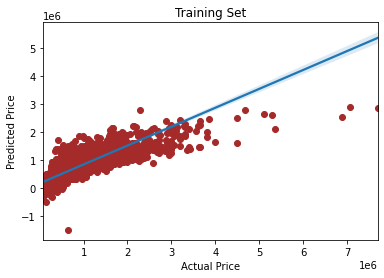

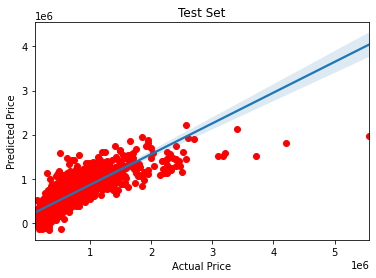

Root Mean Square =  198858.12305299772


198858.12305299772

In [15]:
pipeline_prediction_plot(features, label, pipeline)

In [16]:
pipeline['Regression_Model'].get_params()

{'theta_0': 542777.5699550142,
 'theta_1': 89152.62592955056,
 'theta_2': 62869.10725529836,
 'theta_3': 21938.850898478282,
 'theta_4': -78945.7467021364,
 'theta_5': -76011.25461530256,
 'theta_6': -22311.21431367326,
 'theta_7': -15989.352835192776,
 'theta_8': -12267.569792664939,
 'theta_9': -19697.47401340767,
 'theta_10': 51446.7104996897,
 'theta_11': 25949.589715741397,
 'theta_12': -30216.74195327609,
 'theta_13': 73353.97812502802,
 'theta_14': -25049.313882823662,
 'theta_15': -14212.998854178664}